# Разведочный анализ данных (exploratory data analysis, EDA)

Задачи, которые ставятся перед аналитиками, достаточно разнообразны. Однако всё начинается с данных. 

В этом курсе мы не будем касаться бизнес-составляющей анализа данных, но при этом нужно понимать, что данные не берутся "из воздуха". Как и задачи, связанные с ними. В книге [Билла Фрэнкса](https://play.google.com/store/books/details/%D0%91_%D0%A4%D1%80%D1%8D%D0%BD%D0%BA%D1%81_%D0%A0%D0%B5%D0%B2%D0%BE%D0%BB%D1%8E%D1%86%D0%B8%D1%8F_%D0%B2_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D1%82%D0%B8%D0%BA%D0%B5_%D0%9A%D0%B0%D0%BA_%D0%B2_%D1%8D%D0%BF%D0%BE%D1%85%D1%83_Big_Dat?id=yPvkDQAAQBAJ) об операционной аналитике автор акцентирует внимание на том, что непродуманные инвестиции в сбор и хранение данных по принципу "а вдруг потом пригодятся" зачастую себя не оправдывают. Только после того, как поставлена определённая цель, можно начинать процесс сбора (или, возможно, покупки) и анализа данных.

К сожалению, на практике данные в "сыром" виде обычно малопригодны для анализа. Процесс подготовки и очистки данных (препроцессинг, англ. data preparation, pre-processing, data cleaning) может быть **весьма трудоёмким** и по времени занимать больше, чем собственно построение и валидация моделей на основе данных. Выделим некоторые составляющие этого процесса:

- data specification (понимание данных)
- data editing (редактирование данных, исправление ошибок --- ручное, автоматическое или их комбинация)
- работа с пропущенными значениями
- нормализация
- feature extraction and selection (создание и отбор признаков)

В результате получаем данные в удобном для анализа формате, как правило, табличном. Таблица (или датафрейм) имеет структуру "объекты-признаки": строки соответствуют отдельным сущностям (объектам, примерам, экземплярам), а столбцы --- атрибутам этих сущностей (признакам).

## Экосистема Python. Библиотека NumPy

Python --- высокоуровневый язык программирования общего назначения. На сегодня это наиболее востребованный язык программирования в Data Science и Machine Learning. Однако "чистый" Python имеет ряд недостатков, главным образом, связанных со временем выполнения кода. Традиционные структуры данных, такие как списки и кортежи, а также циклы for и while работают "медленно", и в случае анализа больших данных это становится проблемой. 

Библиотека NumPy предназначена для работы с многомерными массивами (arrays) и разработана таким образом, чтобы время выполнения операций с большими данными было **существенно меньше** (иногда в сотни или даже тысячи раз), чем при использовании "чистого" Python. Библиотека содержит большое количество быстрых и высокоуровневых операций с одно-, дву- и многомерными массивами (тензорами), а также ряд функций векторной и матричной алгебры. На базе массивов NumPy работают все библиотеки более высокого уровня в экосистеме Python (Pandas, Matplotlib, Scikit-Learn, библиотеки глубокого обучения Tensorflow, PyTorch и многие другие), что делает изучение идеологии массивов NumPy и возможностей этой библиотеки безусловным "must have" для аналитика.

## Библиотека Pandas

Pandas --- библиотека Python, основное предназначение которой --- загрузка, препроцессинг и разведочный анализ данных. Разведочный анализ предшествует непосредственно построению предсказательных моделей машинного обучения и призван помочь исследователю лучше понять особенности датасета, взаимосвязи (корреляции) между признаками, а также сделать первые простые выводы на основе данных. Однако "просто" --- не значит "плохо". Эти (на первый взгляд) примитивные выводы дают ориентиры (baselines) для последующих более сложных моделей, а может оказаться и так, что именно найденные на этапе разведочного анализа закономерности помогут достичь желаемой цели без погружения в сложные модели машинного обучения.

## Визуализация. Библиотеки Matplotlib и Seaborn

Важная составляющая разведочного анализа --- визуализация данных. Качественные графики и диаграммы помогают увидеть больше, чем скучные и однообразные таблицы. Библиотека Pandas имеет встроенные средства визуализации на основе графики Matplotlib. Сама по себе библиотека Matplotlib предоставляет множество низкоуровневых графических инструментов, так что исследователь может контролировать буквально всё --- от цвета точек до шрифтов на осях координат. Библиотека Seaborn содержит больше высокоуровневых возможностей и призвана в какой-то степени "упростить жизнь" пользователям Matplotlib, автоматизируя многие рутинные вещи. Обычно встроенная графика Pandas, библиотеки Matplotlib и Seaborn используются совместно, что мы и продемонстрируем в дальнейшем.

In [1]:
# Импорт нужных библиотек
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(); # более красивый внешний вид графиков по умолчанию

## Загрузка данных

Данные, прошедшие предварительную подготовку и обработку, обычно имеют табличный формат и хранятся в виде CSV-файлов (а также TSV, XLS, XLSX etc.). В этом случае стоит использовать метод [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Также данные могут подтягиваться непосредственно из табличных баз данных, и для этих целей Pandas имеет метод [read_sql](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html). В других случаях могут пригодиться [read_json](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html) и [прочие методы](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

В ходе этого курса мы рассмотрим работу не только с традиционными табличными данными, но также с текстом и изображениями.

Метод [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) имеет множество настраиваемых параметров. Наиболее существенные из них: имя файла (или URL), тип разделителя ячеек (по умолчанию --- запятая), наличие строки заголовка (указывается её номер; по умолчанию имена признаков считываются из первой строки файла), наличие колонки с индексами (идентификаторами) строк (также указывается номер; по умолчанию --- отсутствует). С остальными параметрами рекомендуем ознакомиться в документации.

In [2]:
df = pd.read_csv('../input/cardio_train.csv', sep=';')

## Первый взгляд на данные

In [3]:
# Метод head(n) предназначен для просмотра первых n строк таблицы (по умолчанию n=5)
# Аналогично метод tail(n) возвращает последние n строк
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# Если признаков (столбцов) слишком много, полезно будет транспонировать вывод
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,0.0,1.0,2.0,3.0,4.0,8.0,9.0,12.0,13.0,14.0
age,18393.0,20228.0,18857.0,17623.0,17474.0,21914.0,22113.0,22584.0,17668.0,19834.0
gender,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0
height,168.0,156.0,165.0,169.0,156.0,151.0,157.0,178.0,158.0,164.0
weight,62.0,85.0,64.0,82.0,56.0,67.0,93.0,95.0,71.0,68.0
ap_hi,110.0,140.0,130.0,150.0,100.0,120.0,130.0,130.0,110.0,110.0
ap_lo,80.0,90.0,70.0,100.0,60.0,80.0,80.0,90.0,70.0,60.0
cholesterol,1.0,3.0,3.0,1.0,1.0,2.0,3.0,3.0,1.0,1.0
gluc,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
smoke,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Метод info() позволяет вывести общую информацию о датасете
# Мы можем узнать тип каждого признака, а также есть ли в данных пропуски
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
# Метод describe() позволяет собрать некоторую статистику по каждому числовому признаку
# Для более удобного прочтения полученную таблицу можно транспонировать
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


Обратим внимание, что некоторые из признаков бинарные (smoke, alco, active, cardio), поэтому стандартные описательные статистики --- среднее, стандартное отклонение, медиана, квартили --- для них не имеют смысла. В этом случае полезнее будет обычный подсчёт значений. Например, так мы можем узнать, сколько пациентов с выявленными сердечно-сосудистыми заболеваниями (ССЗ) имеется в выборке.

In [7]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

Мы видим, что здоровых и больных у нас примерно равное количество, т. е. классы 0 и 1 сбалансированы (о проблеме несбалансированных классов мы будем говорить позже).

In [8]:
# Параметр normalize позволяет узнать процентное соотношение
df['cardio'].value_counts(normalize=True)

0    0.5003
1    0.4997
Name: cardio, dtype: float64

## Исследуем отдельные признаки ("фичи")

Посмотрим на распределение значений роста пациентов. Теория утверждает, что рост --- величина, обычно имеющая нормальное распределение.

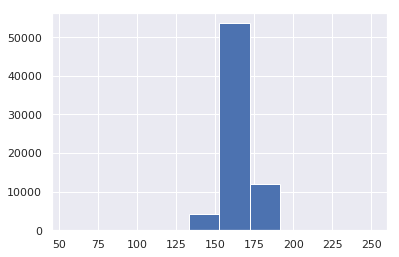

In [9]:
df['height'].hist();

График по умолчанию оказался малоинформативным. Попробуем улучшить ситуацию, добавив параметр bins.

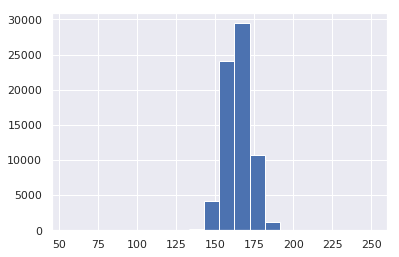

In [10]:
df['height'].hist(bins=20);

Как и ожидалось, имеем нечто похожее на гистограмму нормального распределения. Однако на картнике не видны выбросы (outliers) --- точки, "выбивающиеся" из общей картины. Поэтому иногда полезнее применить boxplot ("ящик с усиками").

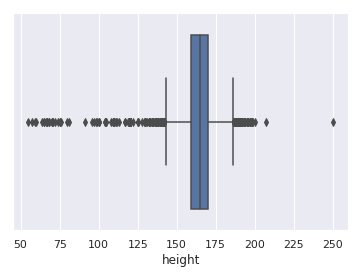

In [11]:
sns.boxplot(df['height']);

Ширина "ящика" равна интерквартильному размаху (разность между третьим $Q_3$ и первым $Q_1$ квартилями). Вертикальная линия внутри ящика показывает медиану (второй квартиль). "Усики" ограничивают точки, попадающие в интервал $[Q_1-1.5*IQR; Q_3+1.5*IQR]$, где $IQR$ --- интерквартильный размах. Наконец, отдельные точки на графике соответствуют выбросам --- нетипичным для данной выборки значениям. Как видим, их оказалось довольно много.

## Исследуем признаки совместно

Например, исследователя может интересовать вопрос: каков средний возраст здоровых и больных пациентов? Признак age имеет неудобную для интерпретации единицу измерения --- дни, поэтому преобразуем его в количество лет. 

In [12]:
# Обратите внимание - мы применяем здесь метод, а не функцию round. Это значительно ускоряет вычисления
# Операция "деления столбца на число" работает интуитивно понятно - 
# каждый элемент делится на это число. Магия NumPy в действии!
df['age'] = (df['age'] / 365).round()

### GROUP BY
Внимание: здесь мы знакомимся с одной очень полезной операцией --- группировкой. Метод groupby работает аналогично операции GROUP BY в языке SQL и позволяет группировать данные по одному или нескольким атрибутам, вычисляя затем агрегированные показатели в каждой группе.

In [13]:
# Синтаксис предельно прост, лаконичен и интуитивно понятен
df.groupby('cardio')['age'].mean()

cardio
0    51.731218
1    54.948083
Name: age, dtype: float64

Как показывают вычисления, средний возраст людей с ССЗ чуть выше, чем у здоровых. Эти вычисления можно также визуализировать с помощью встроенной графики Pandas.

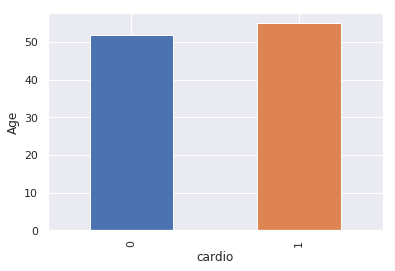

In [14]:
df.groupby('cardio')['age'].mean().plot(kind='bar') 
plt.ylabel('Age') # добавляем подпись на оси Оу
plt.show();

### countplot
Теперь попробуем посмотреть, как распределено количество здоровых и больных пациентов по возрастным группам. Здесь нам поможет график countplot библиотеки Seaborn.

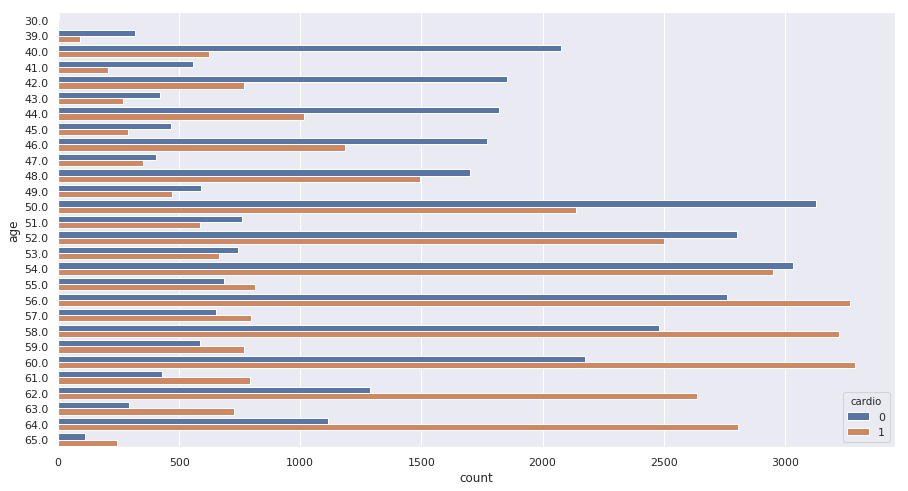

In [15]:
plt.figure(figsize=(15, 8)) # увеличим размер картинки
sns.countplot(y='age', hue='cardio', data=df);

Важное наблюдение --- начиная с 55 лет количество больных пациентов превышает количество здоровых.

### Scatter plot
Полезным типом графика для исследования пар числовых признаков является диаграмма рассеяния (scatter plot). Рассмотрим возраст и рост пациентов.

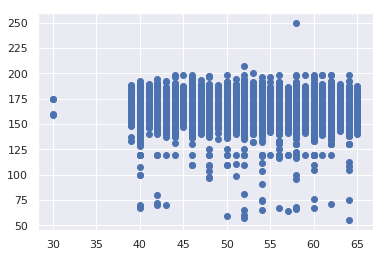

In [16]:
plt.scatter(df['age'], df['height']);

Здесь становится ясно, что наши выбросы в данных --- это просто ошибки ввода. Если, конечно, мы не проводили исследование среди лиллипутов :)

Для изучения совместного распределения двух числовых признаков полезным может оказаться jointplot библиотеки Seaborn:

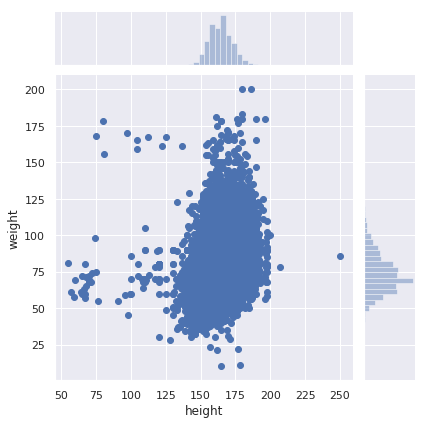

In [17]:
sns.jointplot(x='height', y='weight', data=df);

Ошибки и аномалии в данных чётко видны и на этом графике. Также можно заключить, что без учёта выбросов рост и вес имеют распределения, близкие к нормальному.

### Сводные таблицы

Для исследования трёх и более признаков полезным инструментов являются сводные таблицы (pivot tables). Этот инструмент хорошо знаком продвинутым пользователям электронных таблиц Excel, Google Spreadsheets. Рассмотрим, как с помощью сводной таблицы ответить на вопросы: 
- верно ли, что с возрастом люди становятся более склонны к употреблению алкоголя;
- верно ли, что среди курящих процент ССЗ больше.

In [18]:
# values - признаки, по которым вычисляются значения функции aggfunc
# index - признаки, по которым выполняется группировка
df.pivot_table(values=['age', 'cardio'], index=['smoke', 'alco'], aggfunc='mean')

age    cardio
smoke alco                     
0     0     53.449185  0.501462
      1     53.121990  0.523037
1     0     52.493627  0.487833
      1     51.838188  0.444444

Как видим, ответы на оба вопроса отрицательные. Склонность к алкоголю, похоже, не коррелирует с возрастом, а процент ССЗ оказался выше среди некурящих.

Чтобы понять, как связаны употребление алкоголя и курение, посмотрим на кросс-таблицу (таблицу сопряжённости):

In [19]:
pd.crosstab(df['smoke'], df['alco'])

alco,0,1
smoke,,
0,61921,1910
1,4315,1854


Пока можно только сказать, что непьющих и некурящих пациентов существенно больше, чем всех остальных. Для обоснованных выводов о взаимосвязи следует обратиться к численным расчётам.

## Выборка данных по условию. Способы индексирования в Pandas

Иногда нам нужно провести вычисления не на всей обучающей выборке, а на некоторой её части. Для этого нужно знать и понимать способы доступа к ячейкам в датафреймах.

Начнём с исследования одного признака "в себе". Для примера возьмём рост.

In [20]:
h = df['height'] # сохраним всю колонку "рост" в отдельную переменную для экспериментов
type(h) # посмотрим тип 

pandas.core.series.Series

Таким образом, видим, что таблица (датафрейм, DataFrame) представляет собой набор именованных столбцов (рядов, Series). Доступ к столбцам осуществляется по ключу --- названию столбца, как в словарях Python. Технически можно представлять себе датафрейм как словарь столбцов.

А как же насчёт строк?

In [21]:
first_patient = df[0]

KeyError: 0

Oops! Мы получили ошибку: KeyError означает, что нет столбца с именем "0". То есть обратиться к строке через обычный индекс мы не можем. Для этого нам будет нужен "неявный" индекс (implicit loc, iloc).

In [22]:
first_patient = df.iloc[0]
print(first_patient)

id               0.0
age             50.0
gender           2.0
height         168.0
weight          62.0
ap_hi          110.0
ap_lo           80.0
cholesterol      1.0
gluc             1.0
smoke            0.0
alco             0.0
active           1.0
cardio           0.0
Name: 0, dtype: float64


И опять мы видим, что технически строка датафрейма представляет собой словарь. Ключами словаря являются имена столбцов, значениями --- значения признаков для данной строки.

Чтобы узнать, например, возраст первого пациента (не запоминая его в отдельную переменную), нужно применить явное индексирование (loc):

In [23]:
print(df.loc[0, 'age'])

50.0


Вернёмся теперь к переменной h. Напомню, в ней мы сохранили все значения из столбца "рост". Рост указан в сантиметрах. Переведём в метры.

In [24]:
h_meters = h / 100 # предельно просто!
h_meters[:10] # в отдельных столбцах уже можно применять "обычные" срезы, как в списках

0    1.68
1    1.56
2    1.65
3    1.69
4    1.56
5    1.51
6    1.57
7    1.78
8    1.58
9    1.64
Name: height, dtype: float64

Выше на нескольких диаграммах мы видели, что среди значений роста присутствуют ошибки. Давайте посмотрим, сколько пациентов имеют рост ниже 125 см. Внимание, вопрос --- как решить эту задачу в классическом стиле?

In [25]:
%%timeit
lilliputs = 0
for value in h:
    if value < 125:
        lilliputs = lilliputs + 1

4.24 ms ± 24.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


А теперь решим ту же задачу в NumPy-стиле:

In [26]:
%%timeit
h[h < 125].shape[0]

529 µs ± 2.54 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Итак, второй способ оказался быстрее приблизительно в 5 раз на наборе данных из 70000 значений (относительно небольшом). С ростом длины вектора циклы становятся в сотни и тысячи раз медленнее, чем векторизованные операции NumPy.

Итак, выборку из массива значений можно выполнять по условному индексу. Похожим образом это работает и для отбора строк в датафрейме.

In [27]:
# Вычислим средний возраст людей, склонных к курению
df[df['smoke'] == 1]['age'].mean()

52.29664451288701

In [28]:
# Условие может быть составным
df[(df['smoke'] == 1) & (df['cardio'] == 1)]['age'].mean()

53.76135199726869

## Фильтрация датафрейма. Удаление строк и столбцов

Для удаления строк и столбцов в датафрейме используется метод drop. Рассмотрим удаление по ключам и по условию.

In [29]:
# Удалим целевой признак cardio
dummy_df = df.drop('cardio', axis=1)
dummy_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0


In [30]:
# Удалим первые 100 пациентов
dummy_df = df.drop(np.arange(100), axis=0)
dummy_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
100,135,40.0,2,171,61.0,110,70,1,1,0,0,1,0
101,136,51.0,1,167,80.0,190,90,2,1,0,1,0,0
102,137,47.0,1,168,77.0,100,70,1,1,0,0,1,0
103,138,50.0,2,183,95.0,125,80,1,3,1,0,1,0
104,139,60.0,1,170,72.0,120,80,1,1,0,0,0,1


In [31]:
# Удалим всех пацентов с ростом ниже 125 см, а также выше 200 см
dummy_df = df.drop(df[(df['height'] < 125) | (df['height'] > 200)].index)
dummy_df.shape[0] / df.shape[0]

0.9987285714285714

Как видим, процент выбросов небольшой --- оставшаяся выборка составляет 99.9 % исходной.

## Добавление новых признаков

In [32]:
df['height_cm'] = df['height'] / 100
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_cm
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,1.68
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,1.56
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,1.65
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,1.69
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,1.56


## Перекодировка значений признаков
Наш датасет содержит только числовые значения, однако часто среди признаков есть категориальные, и в этом случае на этапе предобработки нужно применить один из видов кодирования. Простейший тип кодирования --- замена одних значений другими (label encoding). В данном случае нам придётся (исключительно с целью продемонстрировать работу метода) применить обратную операцию. Например, перекодируем признак "уровень холестерина" по принципу:
- 1 --- "low"
- 2 --- "normal"
- 3 --- "high"

In [33]:
new_values = {1:'low', 2:'normal', 3:'high'} # обычный словарь Python
df['dummy_cholesterol'] = df['cholesterol'].map(new_values)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_cm,dummy_cholesterol
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,1.68,low
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,1.56,high
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,1.65,high
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,1.69,low
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,1.56,low


Перекодируем целевой признак cardio в логический (True/False).

In [34]:
df['cardio'] = df['cardio'].astype(bool)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_cm,dummy_cholesterol
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,False,1.68,low
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,True,1.56,high
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,True,1.65,high
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,True,1.69,low
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,False,1.56,low


# Задания для самостоятельной работы

1. Определите количество мужчин и женщин среди испытуемых. Обратите внимание, что способ кодирования переменной gender мы не знаем. Воспользуемся медицинским фактом, а именно: мужчины в среднем выше женщин.

2. Верно ли, что мужчины более склонны к употреблению алкоголя, чем женщины?

3. Каково различие между процентами курящих мужчин и женщин?

4. Какова разница между средними значениями возраста для курящих и некурящих?

5. Создайте новый признак --- BMI (body mass index, индекс массы тела). Для этого разделите вес в килограммах на квадрат роста в метрах. Считается, что нормальные значения ИМТ составляют от 18.5 до 25. Выберите верные утверждения:

    (a) Средний ИМТ находится в диапазоне нормальных значений ИМТ.

    (b) ИМТ для женщин в среднем выше, чем для мужчин.

    (c) У здоровых людей в среднем более высокий ИМТ, чем у людей с ССЗ.

    (d) Для здоровых непьющих мужчин ИМТ ближе к норме, чем для здоровых непьющих женщин

6. Удалите пациентов, у которых диастолическое давление выше систолического. Какой процент от общего количества пациентов они составляли?

7. На сайте Европейского общества кардиологов представлена шкала [SCORE](https://www.escardio.org/static_file/Escardio/Subspecialty/EACPR/Documents/score-charts.pdf). Она используется для расчёта риска смерти от сердечно-сосудистых заболеваний в ближайшие 10 лет. 

    Рассмотрим верхний правый прямоугольник, который показывает подмножество курящих мужчин в возрасте от 60 до 65 лет (значения по вертикальной оси на рисунке представляют верхнюю границу).

    Мы видим значение 9 в левом нижнем углу прямоугольника и 47 в правом верхнем углу. Это означает, что для людей этой возрастной группы с систолическим давлением менее 120 и низким уровнем холестерина риск сердечно-сосудистых заболеваний оценивается примерно в 5 раз ниже, чем для людей с давлением в интервале [160, 180] и высоким уровнем холестерина.

    Вычислите аналогичное соотношение для наших данных.

8. Визуализируйте распределение уровня холестерина для различных возрастных категорий.

9. Как распределена переменная BMI? Есть ли выбросы 

10. Как соотносятся ИМТ и наличие ССЗ? Придумайте подходящую визуализацию.


In [35]:
df.groupby('gender')['height'].mean()
new_values = {1:'woman', 2:'man'}
df['gender'] = df['gender'].map(new_values)


In [36]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_cm,dummy_cholesterol
0,0,50.0,man,168,62.0,110,80,1,1,0,0,1,False,1.68,low
1,1,55.0,woman,156,85.0,140,90,3,1,0,0,1,True,1.56,high
2,2,52.0,woman,165,64.0,130,70,3,1,0,0,0,True,1.65,high
3,3,48.0,man,169,82.0,150,100,1,1,0,0,1,True,1.69,low
4,4,48.0,woman,156,56.0,100,60,1,1,0,0,0,False,1.56,low


In [37]:
df['gender'].value_counts()

woman    45530
man      24470
Name: gender, dtype: int64

In [38]:
df.pivot_table(values=['smoke'], index=['gender'], aggfunc='sum')

,smoke
gender,
man,5356
woman,813


In [39]:
df.pivot_table(values=['smoke'], index=['gender'], aggfunc='mean')

,smoke
gender,
man,0.218880
woman,0.017856


In [40]:
a=df.pivot_table(values=['age'], index=['smoke'], aggfunc='mean')
a

,age
smoke,
0,53.439395
1,52.296645


In [41]:
b1=a.loc[0,'age']
b2=a.loc[1,'age']
b=np.abs(b1-b2)
b

1.142750138614609

In [42]:
hei=df['height']/100
df['BMI']=df['weight']/(hei**2)
df


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_cm,dummy_cholesterol,BMI
0,0,50.0,man,168,62.0,110,80,1,1,0,0,1,False,1.68,low,21.967120
1,1,55.0,woman,156,85.0,140,90,3,1,0,0,1,True,1.56,high,34.927679
2,2,52.0,woman,165,64.0,130,70,3,1,0,0,0,True,1.65,high,23.507805
3,3,48.0,man,169,82.0,150,100,1,1,0,0,1,True,1.69,low,28.710479
4,4,48.0,woman,156,56.0,100,60,1,1,0,0,0,False,1.56,low,23.011177
5,8,60.0,woman,151,67.0,120,80,2,2,0,0,0,False,1.51,normal,29.384676
6,9,61.0,woman,157,93.0,130,80,3,1,0,0,1,False,1.57,high,37.729725
7,12,62.0,man,178,95.0,130,90,3,3,0,0,1,True,1.78,high,29.983588
8,13,48.0,woman,158,71.0,110,70,1,1,0,0,1,False,1.58,low,28.440955
9,14,54.0,woman,164,68.0,110,60,1,1,0,0,0,False,1.64,low,25.282570


In [43]:
mean1=df['BMI'].mean()
mean1

27.55651255127882

exercise 5

**a**

In [44]:
if mean1>18.25 and mean1<25:
    print('True')
else:
    print('False')

False


**b**

In [45]:
df.pivot_table(values=['BMI'], index=['gender'], aggfunc='mean')

,BMI
gender,
man,26.754442
woman,27.987583


**c**

In [46]:
df.pivot_table(values=['BMI'], index=['cardio'], aggfunc='mean')

,BMI
cardio,
False,26.548175
True,28.566061


**d**

In [47]:
a=df[(df['gender']=='woman') & (df['cardio']==0) & (df['alco']==0)]
b=a['BMI'].mean()
b
d=df[(df['gender']=='man') & (df['cardio']==0) & (df['alco']==0)]
c=d['BMI'].mean()
print(b,c)

26.845406594131518 25.872638075460173


In [48]:
abs1=np.abs(b-c)
if abs1>18.25 and abs1<25:
    print('True')
else:
    print('False')

False


##### 6

In [49]:
dfdel = df.drop(df[df['ap_hi'] > df['ap_lo']] .index)#удалила пациентов с давлением верхнего выше нижнего
#dfdel.shape[0] / df.shape[0]
dfdel                     
                      

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_cm,dummy_cholesterol,BMI
228,314,48.0,man,183,98.0,160,1100,1,2,1,0,1,True,1.83,low,29.263340
241,334,60.0,man,157,60.0,160,1000,2,1,0,0,0,True,1.57,normal,24.341758
260,357,50.0,woman,150,83.0,140,800,1,1,0,0,1,True,1.50,low,36.888889
329,458,64.0,woman,176,63.0,160,1000,2,2,0,0,0,True,1.76,normal,20.338326
345,482,51.0,woman,154,81.0,140,1000,2,1,0,0,1,True,1.54,normal,34.154158
473,680,42.0,woman,150,95.0,150,1033,1,1,0,0,1,True,1.50,low,42.222222
474,681,52.0,woman,156,65.0,120,150,2,1,0,0,1,False,1.56,normal,26.709402
559,805,56.0,man,173,101.0,200,1000,1,1,0,0,1,True,1.73,low,33.746533
567,815,58.0,woman,168,78.0,14,90,2,1,0,0,1,True,1.68,normal,27.636054
613,886,52.0,woman,165,92.0,140,1000,1,1,1,0,1,True,1.65,low,33.792470


In [50]:
dfd=df.drop(df[])

SyntaxError: invalid syntax (<ipython-input-50-f00eb0d83e54>, line 1)

8


In [51]:

df['age']=df['age']/365.25#перевод в года
df['age_new']=df['age'].apply(np.floor)
df['age_new']
#df['age_new'].values.astype(np.int64)
#print(df['age_new'])


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
69970    0.0
69971    0.0
69972    0.0
69973    0.0
69974    0.0
69975    0.0
69976    0.0
69977    0.0
69978    0.0
69979    0.0
69980    0.0
69981    0.0
69982    0.0
69983    0.0
69984    0.0
69985    0.0
69986    0.0
69987    0.0
69988    0.0
69989    0.0
69990    0.0
69991    0.0
69992    0.0
69993    0.0
69994    0.0
69995    0.0
69996    0.0
69997    0.0
69998    0.0
69999    0.0
Name: age_new, Length: 70000, dtype: float64

In [52]:
#if dfdel[df['age']>40] and dfdel[df['age']<50]:
    #print(dfdel[df['age']>40]==1)
    
if df['age_new'] >25 |df['age_new']<50 :
    df['age_new'] = '1'
elif df['age_new'] >=50 | df['age_new']< 70:
    df['age_new'] = '2'
else:
    df['age_new']==3
    
    
df['age_new']
        

#df.loc[[df['age_new'] > 25 | df['age_new']<50, 'age']] ==1
#df.loc[[df['age_new']>=50 | df['age_new']< 70, 'age']] ==2
#df.loc[[df['age_new']>=70 | df['age_new']<100 ,'age']] ==3

##df['age_new'].astype(np.int64)
#df['age_new']

TypeError: cannot compare a dtyped [float64] array with a scalar of type [bool]

7

In [53]:

tabl=df.pivot_table(values=[ 'cardio'], index=['smoke','age','ap_hi', 'cholesterol'], aggfunc='sum')
tabl

cardio
smoke age      ap_hi cholesterol        
0     0.082136 100   1               0.0
               110   1               0.0
               120   1               0.0
      0.106776 12    1               0.0
               80    1               0.0
               90    1               0.0
                     2               2.0
               100   1               0.0
                     2               1.0
                     3               0.0
               103   1               0.0
               105   1               0.0
               110   1               6.0
                     2               0.0
               114   1               0.0
               115   1               0.0
               120   1              17.0
                     2               4.0
                     3               3.0
               125   1               0.0
               127   1               0.0
               130   1               4.0
                     2               2.0
               138   1               1.0
               140   1              11.0
                     2               5.0
                     3               2.0
               145   2               1.0
               150   1              13.0
                     3               2.0
...                                  ...
1     0.175222 140   1              18.0
                     2               3.0
                     3              12.0
               145   2               1.0
               150   1              13.0
                     2               8.0
                     3               6.0
               151   1               1.0
               160   1               7.0
                     2               2.0
                     3               1.0
               162   3               1.0
               170   1               5.0
               175   1               1.0
               180   1               2.0
                     3               2.0
               200   2               1.0
                     3               1.0
      0.177960 110   1               1.0
               120   1               2.0
                     2               1.0
                     3               1.0
               130   1               3.0
                     2               1.0
                     3               1.0
               140   1               2.0
                     2               1.0
               150   1               1.0
               160   1               2.0
               165   2               1.0

[2846 rows x 1 columns]

8

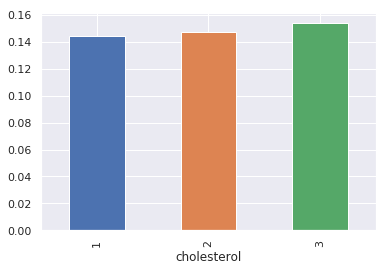

In [54]:

df.groupby('cholesterol')['age'].mean().plot(kind='bar') 

plt.show();

9

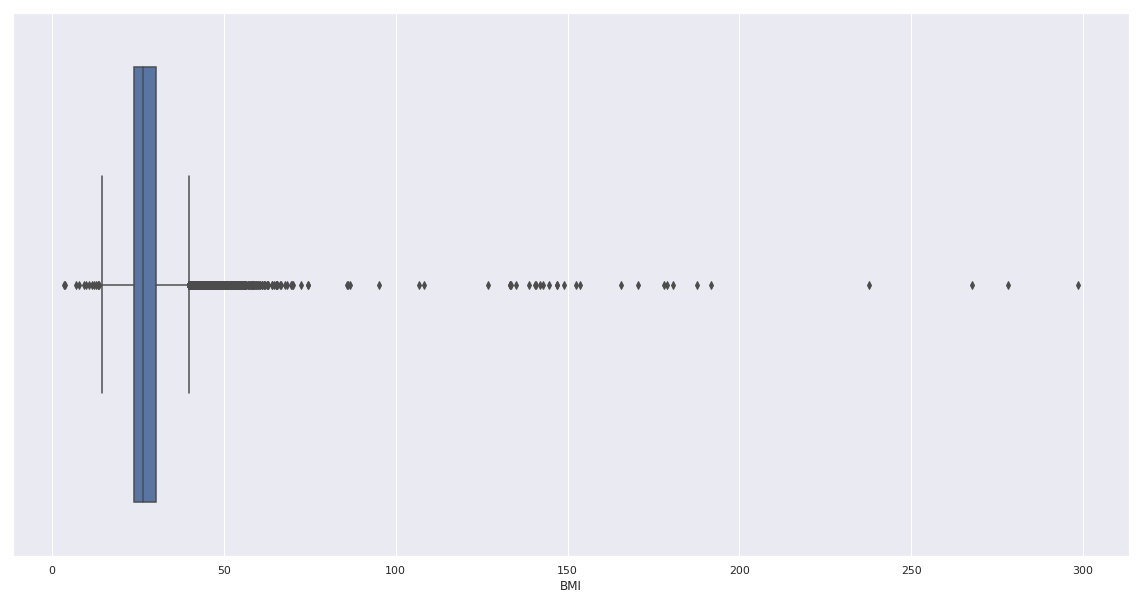

In [55]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(df['BMI']);

10

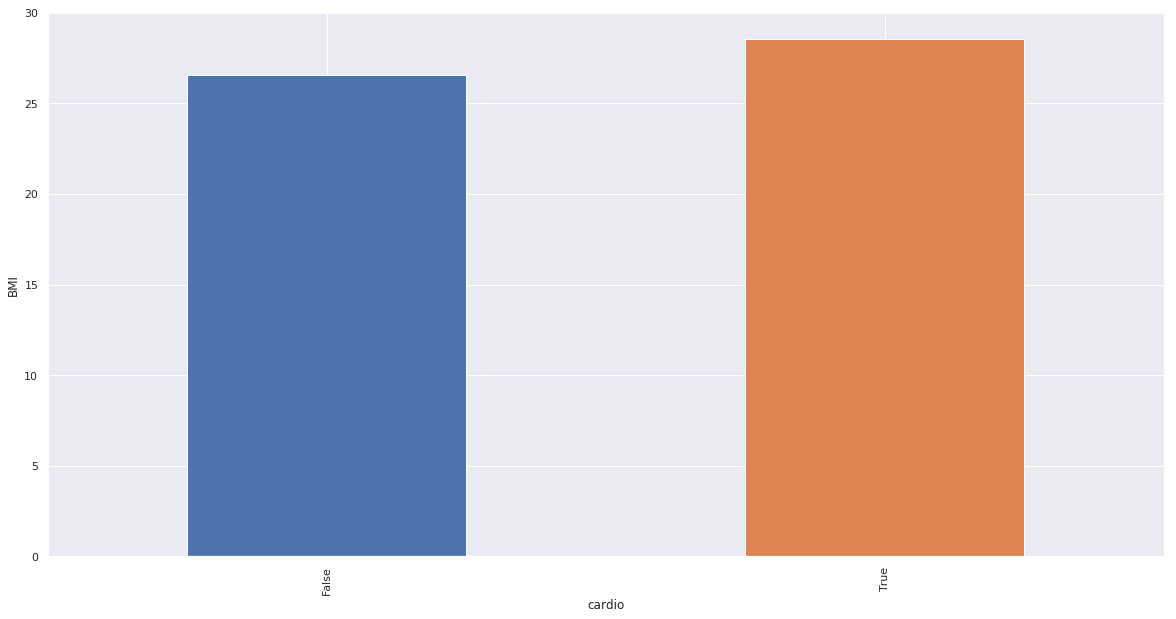

In [56]:
fig, ax = plt.subplots(figsize=(20, 10))
df.groupby('cardio')['BMI'].mean().plot(kind='bar') 
plt.ylabel('BMI') 
plt.show();